# _Foundations of Applied Mathematics_ Labs: Volume 1

In [1]:
%matplotlib inline

# 2. Linear Systems


### Gaussian Elimination

In [10]:
import numpy as np

A = np.array([[1, 1, 1, 1],
              [1, 4, 2, 3],
              [4, 7, 8, 9]], dtype=np.float)

# Reduce the 0th column to zeros below the diagonal.
A[1,0:] -= (A[1,0] / A[0,0]) * A[0]
A[2,0:] -= (A[2,0] / A[0,0]) * A[0]

# Reduce the 1st column to zeros below the diagonal.
A[2,1:] -= (A[2,1] / A[1,1]) * A[1,1:]
print(A)

[[1. 1. 1. 1.]
 [0. 3. 1. 2.]
 [0. 0. 3. 3.]]


_Gaussian elimination is not numerically stable. The NumPy routines that employ row reduction use several tricks to reduce round-off error._

**Problem 1.** Write a function that reduces an arbitrary square matrix $A$ to REF.
You may assume that $A$ is invertible and that a $0$ will never appear on the main diagonal (so only use type III row reductions, not type II).
Avoid operating on entries that you know will be $0$ before and after a row operation. Use at most two nested loops.

Test your function with small test cases that you can check by hand.
Consider using `np.random.randint()` to generate a few manageable tests cases.

**Solution 1.**

### LU Decomposition

**Problem 2.** Write a function that finds the LU decomposition of a square matrix.
You may assume that the decomposition exists and requires no row swaps.

**Solution 2.**

### Forward and Backward Substitution

**Problem 3.** Write a function that, given $A$ and $b$, solves the square linear system $Ax = b$. Use the function from Problem 2 to compute $L$ and $U$, then use (2.1) and (2.2) to solve for $y$, then $x$. You may again assume that no row swaps are required ($P = I$ in this case).

**Solution 3.**

## SciPy

In [11]:
import scipy as sp
hasattr(sp, "stats")            # The stats module isn't loaded yet.

False

In [12]:
from scipy import stats         # Import stats explicitly. Access it
hasattr(sp, "stats")            # with 'stats' or 'sp.stats'.

True

### Linear Algebra

In [13]:
from scipy import linalg as la

# Make a random matrix and a random vector.
A = np.random.random((1000,1000))
b = np.random.random(1000)

# Compute the LU decomposition of A, including pivots.
L, P = la.lu_factor(A)

# Use the LU decomposition to solve Ax = b.
x = la.lu_solve((L,P), b)

# Check that the solution is legitimate.
np.allclose(A @ x, b)

True

**Problem 4.** Write a function that times different `scipy.linalg` functions for solving square linear systems.

For various values of $n$, generate a random $n \times n$ matrix $A$ and a random $n$-vector $b$ using `np.random.random()`.
Time how long it takes to solve the system $Ax = b$ with each of the following approaches:

1. Invert $A$ with `la.inv()` and left-multiply the inverse to $b$.
1. Use `la.solve()`.
1. Use `la.lu_factor()` and `la.lu_solve()` to solve the system with the LU decomposition.
1. Use `la.lu_factor()` and `la.lu_solve()`, but only time `la.lu_solve()` (not the time it takes to do the factorization with `la.lu_factor()`).

Plot the system size $n$ versus the execution times.
Use log scales if needed.

**Solution 4.**

### Sparse Matrices

#### Coordinate Format:

In [14]:
from scipy import sparse

# Define the rows, columns, and values separately.
rows = np.array([0, 1, 0])
cols = np.array([0, 1, 1])
vals = np.array([3, 5, 2])
A = sparse.coo_matrix((vals, (rows,cols)), shape=(3,3))
print(A)

  (0, 0)	3
  (1, 1)	5
  (0, 1)	2


In [15]:
# The toarray() method casts the sparse matrix as a NumPy array.
# Note that this method forfeits all sparsity-related optimizations.
print(A.toarray()) 

[[3 2 0]
 [0 5 0]
 [0 0 0]]


#### DOK and LIL Formats:

In [16]:
B = sparse.lil_matrix((2,6))
B[0,2] = 4
B[1,3:] = 9

print(B.toarray())

[[0. 0. 4. 0. 0. 0.]
 [0. 0. 0. 9. 9. 9.]]


#### DIA Format:

In [17]:
# Use sparse.diags() to create a matrix with diagonal entries.
diagonals = [[1,2],[3,4,5],[6]]     # List the diagonal entries.
offsets = [-1,0,3]                  # Specify the diagonal they go on.
print(sparse.diags(diagonals, offsets, shape=(3,4)).toarray())

[[3. 0. 0. 6.]
 [1. 4. 0. 0.]
 [0. 2. 5. 0.]]


In [18]:
# If all of the diagonals have the same entry, specify the entry alone.
A = sparse.diags([1,3,6], offsets, shape=(3,4))
print(A.toarray())

[[3. 0. 0. 6.]
 [1. 3. 0. 0.]
 [0. 1. 3. 0.]]


In [19]:
# Modify a diagonal with the setdiag() method.
A.setdiag([4,4,4], 0)
print(A.toarray())

[[4. 0. 0. 6.]
 [1. 4. 0. 0.]
 [0. 1. 4. 0.]]


#### BSR Format:

In [20]:
# Use sparse.bmat() to create a block matrix. Use 'None' for zero blocks.
A = sparse.coo_matrix(np.ones((2,2)))
B = sparse.coo_matrix(np.full((2,2), 2.))
print(sparse.bmat([[  A , None,  A  ],
                   [None,  B  , None]], 
                  format='bsr').toarray())

[[1. 1. 0. 0. 1. 1.]
 [1. 1. 0. 0. 1. 1.]
 [0. 0. 2. 2. 0. 0.]
 [0. 0. 2. 2. 0. 0.]]


In [21]:
# Use sparse.block_diag() to construct a block diagonal matrix.
print(sparse.block_diag((A,B)).toarray())

[[1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 2. 2.]
 [0. 0. 2. 2.]]


NOTE: Visualizing a sparse matrix

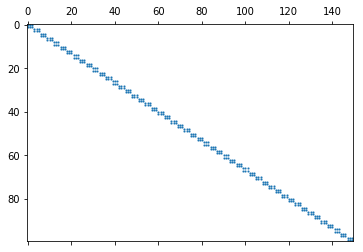

In [22]:
from matplotlib import pyplot as plt

# Construct and show a matrix with 50 2x3 diagonal blocks.
B = sparse.coo_matrix([[1,3,5],[7,9,11]])
A = sparse.block_diag([B]*50)
plt.spy(A, markersize=1)
plt.show()

**Problem 5.** Let $I$ be the $n\times n$ identity matrix, and define

$A =\begin{bmatrix}
B & I &      &        & \\
I & B &  I   &        & \\
  & I & \ddots & \ddots & \\
  &   & \ddots & \ddots & I \\
  &   &        &    I   & B
\end{bmatrix}$, $\quad$
$B = \begin{bmatrix}
-4 &  1 &      &        & \\
 1 & -4 &  1   &        & \\
   &  1 & \ddots & \ddots & \\
   &    & \ddots & \ddots & 1 \\
   &    &        &    1   & -4
\end{bmatrix}$,

where $A$ is $n^2\times n^2$ and each block $B$ is $n\times n$.
The large matrix $A$ is used in finite difference methods for solving Laplace's equation in two dimensions, $\frac{\partial^2u}{\partial x^2} + \frac{\partial^2u}{\partial y^2} = 0$.

Write a function that accepts an integer $n$ and constructs and returns $A$ as a sparse matrix. Use `plt.spy()` to check that your matrix has nonzero values in the correct places.

**Solution 5.**

#### Sparse Matrix Operations

In [23]:
# Initialize a sparse matrix incrementally as a lil_matrix.
A = sparse.lil_matrix((10000,10000))
for k in range(10000):
    A[np.random.randint(0,9999), np.random.randint(0,9999)] = k
A

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 9999 stored elements in LInked List format>

In [24]:
# Convert A to CSR and CSC formats to compute the matrix product AA.
Acsr = A.tocsr()
Acsc = A.tocsc()
Acsr.dot(Acsc)

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 9941 stored elements in Compressed Sparse Row format>

_Note that NumPy arrays and SciPy sparse matrices have slightly different syntax._ SciPy has its own linear algebra library for sparse matrices.

In [25]:
from scipy.sparse import linalg as spla

**Problem 6.** Write a function that times regular and sparse linear system solvers.

For various values of $n$, generate the $n^2 \times n^2$ matrix $A$ described in Problem 5 and a random vector $\mathbf{b}$ with $n^2$ entries.
Time how long it takes to solve the system $A\mathbf{x} = \mathbf{b}$ with each of the following approaches:


1. Convert $A$ to CSR format and use `scipy.sparse.linalg.spsolve()` (`spla.spsolve()`).

1. Convert $A$ to a NumPy array and use `scipy.linalg.solve()` (`la.solve()`).


In each experiment, only time how long it takes to solve the system (not how long it takes to convert $A$ to the appropriate format).

Plot the system size $n^{2}$ versus the execution times.
As always, use log scales where appropriate and use a legend to label each line.


**Solution 6.**

#### Improvements on the LU Decomposition

In [27]:
A = np.zeros(3) + np.vstack(np.arange(3))
P = np.arange(3)
print(A)

[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]]


In [28]:
# Swap rows 1 and 2.
A[1], A[2] = np.copy(A[2]), np.copy(A[1])
P[1], P[2] = P[2], P[1]
print(A)                        # A with the new row arrangement.

[[0. 0. 0.]
 [2. 2. 2.]
 [1. 1. 1.]]


In [29]:
print(P)                        # The permutation of the rows.

[0 2 1]


In [30]:
print(A[P])                     # A with the original row arrangement.

[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]]
